# Module - 5

# Naive Bayes Algorithm

In [3]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=p.read_csv('Coviddata.csv')

In [6]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,12-11-2020,0,1,0,0,0,negative,No,male,Other
1,12-11-2020,1,0,0,0,0,negative,No,female,Other
2,12-11-2020,0,1,0,0,0,negative,No,female,Other
3,12-11-2020,0,0,0,0,0,negative,No,female,Other
4,12-11-2020,0,0,0,0,0,negative,No,male,Other


In [7]:
data.shape

(11864, 10)

In [8]:
df = data.dropna()

In [9]:
df.head(3)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,12-11-2020,0,1,0,0,0,negative,No,male,Other
1,12-11-2020,1,0,0,0,0,negative,No,female,Other
2,12-11-2020,0,1,0,0,0,negative,No,female,Other


In [10]:
df.shape

(11484, 10)

In [11]:
del df['test_date']

In [12]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11859     True
11860     True
11861     True
11862     True
11863     True
Length: 11484, dtype: bool

In [14]:
sum(df.duplicated())

11297

In [15]:
df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [16]:
df.corona_result.unique()

array(['negative', 'positive', 'other'], dtype=object)

In [17]:
p.Categorical(df['corona_result']).describe()

,counts,freqs
categories,,
negative,9681,0.842999
other,423,0.036834
positive,1380,0.120167


In [18]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['corona_result', 'age_60_and_above', 'gender', 'test_indication']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [19]:
df.corona_result.unique()

array([0, 2, 1])

In [20]:
p.Categorical(df.corona_result).describe()

,counts,freqs
categories,,
0,9681,0.842999
1,423,0.036834
2,1380,0.120167


In [21]:
df['result'] = df.corona_result.map({0:0,1:1,2:1})

In [22]:
df.result.unique()

array([0, 1], dtype=int64)

In [23]:
p.Categorical(df['result']).describe()

,counts,freqs
categories,,
0,9681,0.842999
1,1803,0.157001


In [24]:
del df['corona_result']

In [25]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'test_indication', 'result'],
      dtype='object')

In [26]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='result', axis=1)
#Response variable
y = df.loc[:,'result']  

In [27]:
'''We'll use a test size of 30%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  8038
Number of test dataset:  3446
Total number of dataset:  11484


In [28]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

gnb.fit(X_train,y_train)

predictNB = gnb.predict(X_test)

print("")
print('Classification report of Naive Bayes Results:')
print("")
print(classification_report(y_test,predictNB))

print("")
cm1=confusion_matrix(y_test,predictNB)
print('Confusion Matrix result of Naive Bayes is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(gnb, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Naive Bayes Algorithm is:",accuracy.mean() * 100)
NB=accuracy.mean() * 100


Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2905
           1       0.75      0.36      0.49       541

    accuracy                           0.88      3446
   macro avg       0.82      0.67      0.71      3446
weighted avg       0.87      0.88      0.86      3446


Confusion Matrix result of Naive Bayes is:
 [[2841   64]
 [ 345  196]]

Sensitivity :  0.9779690189328744

Specificity :  0.36229205175600737

Cross validation test results of accuracy:
[0.90727035 0.88419678 0.88855028 0.9042229  0.89808362]

Accuracy result of Naive Bayes Algorithm is: 89.6464787429142


In [30]:
def graph():
    import matplotlib.pyplot as plt
    data=[NB]
    alg="Naive Bayes"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("g"))
    plt.title("Accuracy comparison of Covid Result",fontsize=15)
    plt.legend(b,data,fontsize=9)

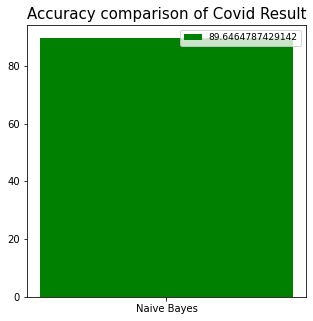

In [31]:
graph()

In [32]:
TP = cm1[0][0]
FP = cm1[1][0]
FN = cm1[1][1]
TN = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 2841
True Negative : 64
False Positive : 345
False Negative : 196

True Positive Rate : 0.9354626275930195
True Negative Rate : 0.15647921760391198
False Positive Rate : 0.843520782396088
False Negative Rate : 0.06453737240698057

Positive Predictive Value : 0.891713747645951
Negative predictive value : 0.24615384615384617


Confusion matrix-Naive Bayes:
[[2841   64]
 [ 345  196]]


<AxesSubplot:>

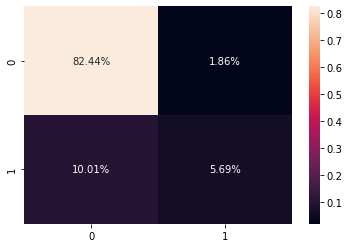

In [34]:
def plot_confusion_matrix(cm1, title='Confusion matrix-Naive Bayes', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm1=confusion_matrix(y_test, predictNB)
print('Confusion matrix-Naive Bayes:')
print(cm1)
s.heatmap(cm1/n.sum(cm1),annot =True, fmt='.2%')